In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv(r"C:\Users\srira\Desktop\Ram\Data science\Course - Assignments\Module 15 - Association rules\Dataset\my_movies.csv")
movies.head(10)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movies = movies.iloc[:,5:]
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
movies.shape

(10, 10)

In [6]:
movies_count = []
for movie in movies.columns:
    movies_count.append(movies[movie].value_counts()[1])
movies_count

[6, 7, 2, 2, 6, 2, 1, 1, 1, 2]

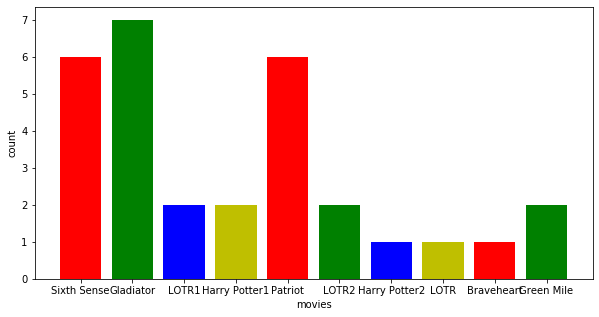

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(height=movies_count, x=movies.columns, color="rgby");plt.xticks(movies.columns);plt.xlabel('movies');plt.ylabel('count')
plt.show()

In [12]:
from mlxtend.frequent_patterns import apriori,association_rules

In [15]:
movie_rules = apriori(movies,min_support=0.1,max_len=3, use_colnames=True)

In [16]:
movie_rules.sort_values('support',ascending=False,inplace=True)
movie_rules

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
17,0.6,"(Patriot, Gladiator)"
4,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"
13,0.4,"(Patriot, Sixth Sense)"
30,0.4,"(Patriot, Gladiator, Sixth Sense)"
3,0.2,(Harry Potter1)
9,0.2,(Green Mile)
5,0.2,(LOTR2)


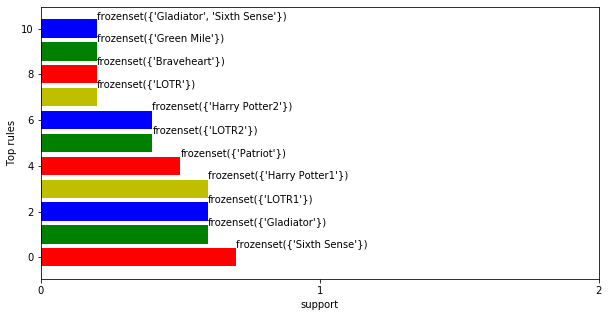

In [17]:
import numpy as np
plt.figure(figsize=(10,5))
plt.barh(y=range(0,11), width =movie_rules.support[0:11], color="rgby");plt.ylabel('Top rules');plt.xlabel('support');plt.xticks(range(0,3))
#adding annotations to the bar plot
y = range(0,11)
x = np.array(movie_rules.support[0:11])
i = 0
for x,y in zip(x,y):
    while(i<11):
        plt.annotate(movie_rules.itemsets[i],(x,y),textcoords="offset points",xytext=(0,10))
        i+=1
        break;
plt.show()

In [18]:
#Now let's try and compute association rules

In [19]:
movie_rules_all = association_rules(movie_rules,metric='lift',min_threshold=1)

In [20]:
movie_rules_all.sort_values('lift',ascending=False,inplace=True)
movie_rules_all.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
85,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
62,"(LOTR2, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
69,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
68,"(Sixth Sense, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
64,(LOTR2),"(LOTR1, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
63,(LOTR1),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
61,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
57,(Green Mile),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [21]:
#Plotting the rules

In [22]:
movie_rules_all['antecedents'] = movie_rules_all['antecedents'].apply(lambda x:', '.join(list(x))).astype("unicode")

In [24]:
movie_rules_all['consequents'] = movie_rules_all['consequents'].apply(lambda x:', '.join(list(x))).astype("unicode")

In [25]:
movie_rules_all.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,"Green Mile, Gladiator",LOTR,0.1,0.1,0.1,1.0,10.0,0.09,inf
85,LOTR,"Green Mile, Gladiator",0.1,0.1,0.1,1.0,10.0,0.09,inf
62,"LOTR2, Harry Potter1",LOTR1,0.1,0.2,0.1,1.0,5.0,0.08,inf
72,Green Mile,LOTR,0.2,0.1,0.1,0.5,5.0,0.08,1.8
69,Green Mile,"Sixth Sense, LOTR2",0.2,0.1,0.1,0.5,5.0,0.08,1.8
68,"Sixth Sense, LOTR2",Green Mile,0.1,0.2,0.1,1.0,5.0,0.08,inf
64,LOTR2,"LOTR1, Harry Potter1",0.2,0.1,0.1,0.5,5.0,0.08,1.8
63,LOTR1,"LOTR2, Harry Potter1",0.2,0.1,0.1,0.5,5.0,0.08,1.8
61,"LOTR1, Harry Potter1",LOTR2,0.1,0.2,0.1,1.0,5.0,0.08,inf
57,Green Mile,"Sixth Sense, Harry Potter1",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [50]:
movie_rules_all.index

Int64Index([80, 85, 62, 72, 69, 68, 64, 63, 61, 57,
            ...
             9,  8,  3,  2,  4, 11,  5,  6, 30, 29],
           dtype='int64', length=124)

In [59]:
#Putting together antecendent & consequent for annotations
ant_cons = []
for i in movie_rules_all.index:
    j = i
    while(i<len(movie_rules_all.antecedents)):
        while(j<len(movie_rules_all.consequents)):
            ant_cons.append("("+movie_rules_all.antecedents[i] +") & ("+ movie_rules_all.consequents[j]+")")
            break
        break    
ant_cons[:11]

['(Green Mile, Gladiator) & (LOTR)',
 '(LOTR) & (Green Mile, Gladiator)',
 '(LOTR2, Harry Potter1) & (LOTR1)',
 '(Green Mile) & (LOTR)',
 '(Green Mile) & (Sixth Sense, LOTR2)',
 '(Sixth Sense, LOTR2) & (Green Mile)',
 '(LOTR2) & (LOTR1, Harry Potter1)',
 '(LOTR1) & (LOTR2, Harry Potter1)',
 '(LOTR1, Harry Potter1) & (LOTR2)',
 '(Green Mile) & (Sixth Sense, Harry Potter1)',
 '(Sixth Sense, Harry Potter1) & (Green Mile)']

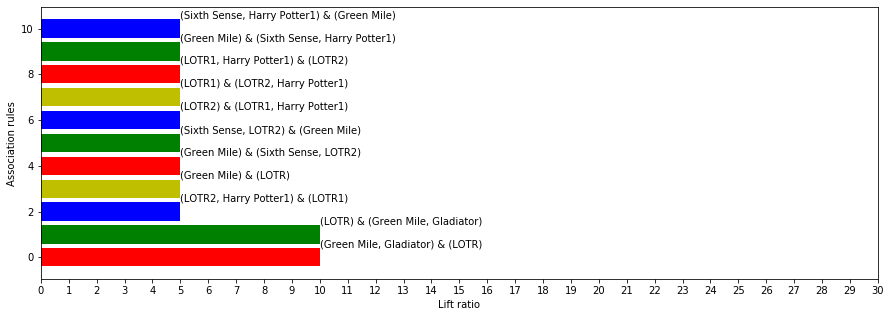

In [60]:
plt.figure(figsize=(15,5))
plt.barh(y=range(0,11), width =movie_rules_all.lift[0:11], color="rgby");plt.ylabel('Association rules');plt.xlabel('Lift ratio');plt.xticks(range(0,31))
#adding annotations to the bar plot
y = range(0,11)
x = np.array(movie_rules_all.lift[0:11])
i = 0
for x,y in zip(x,y):
    while(i<11):
        plt.annotate(ant_cons[i],(x,y),textcoords="offset points",xytext=(0,10))
        i+=1
        break;
plt.show()